In [206]:
pip install pandas openpyxl


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [207]:
pip install geopandas


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [208]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
from matplotlib.patheffects import withStroke
from matplotlib.lines import Line2D

## Data 
Data sourced from USGS, cleaned for GitHub; relations from Wikipedia.
https://en.wikipedia.org/wiki/Foreign_relations_of_the_United_States

In [209]:

# Read the data from the provided GitHub URL

url = "https://github.com/yinaS1234/data-608/blob/main/S7/ct%20list.xls?raw=true"
df = pd.read_excel(url)

us_relations = {
    "Argentina": "Neutral",
    "Australia": "Ally",
    "Austria": "Ally",
    "Bahrain": "Ally",
    "Belgium": "Ally",
    "Bolivia": "Neutral",
    "Brazil": "Neutral",
    "Canada": "Ally",
    "Chile": "Ally",
    "China": "Competitor",
    "Finland": "Ally",
    "France": "Ally",
    "Gabon": "Neutral",
    "Georgia": "Neutral",
    "Germany": "Ally",
    "India": "Ally",
    "Indonesia": "Neutral",
    "Italy": "Ally",
    "Japan": "Ally",
    "Kazakhstan": "Neutral",
    "Madagascar": "Neutral",
    "Malaysia": "Neutral",
    "Mexico": "Ally",
    "Morocco": "Ally",
    "Norway": "Ally",
    "Peru": "Neutral",
    "Philippines": "Ally",
    "Republic of Korea": "Ally",
    "Russia": "Competitor",
    "Senegal": "Neutral",
    "South Africa": "Neutral",
    "Switzerland": "Neutral",
    "United Arab Emirates": "Ally",
    "Vietnam": "Neutral"
}
df['US Relation'] = df['Country'].map(us_relations)
pd.set_option('display.max_rows', None)
print(df)
print(df.info())
print(df.describe(include='all'))

                  Country       Mineral US Relation
0                  Canada      Aluminum        Ally
1    United Arab Emirates      Aluminum        Ally
2                 Bahrain      Aluminum        Ally
3                  Russia      Aluminum  Competitor
4                   China      Antimony  Competitor
5                 Belgium      Antimony        Ally
6                   India      Antimony        Ally
7                 Bolivia      Antimony     Neutral
8                   China       Arsenic  Competitor
9                 Morocco       Arsenic        Ally
10               Malaysia       Arsenic     Neutral
11                Belgium       Arsenic        Ally
12                  India        Barite        Ally
13                  China        Barite  Competitor
14                Morocco        Barite        Ally
15                 Mexico        Barite        Ally
16                  China       Bismuth  Competitor
17      Republic of Korea       Bismuth        Ally
18          

In [210]:
df2=df.groupby('Country').agg({'Mineral':'count'}).reset_index().rename(columns={'Mineral': 'Mineral Count'})
df2.sort_values(by='Mineral Count', ascending=False, inplace=True)
bins = [0, 5, 10, float('inf')]
labels = ['<5', '5-10', '>10']

df2['Bin'] = pd.cut(df2['Mineral Count'], bins=bins, labels=labels)

us_relations = {
    "Argentina": "Neutral",
    "Australia": "Ally",
    "Austria": "Ally",
    "Bahrain": "Ally",
    "Belgium": "Ally",
    "Bolivia": "Neutral",
    "Brazil": "Neutral",
    "Canada": "Ally",
    "Chile": "Ally",
    "China": "Competitor",
    "Finland": "Ally",
    "France": "Ally",
    "Gabon": "Neutral",
    "Georgia": "Neutral",
    "Germany": "Ally",
    "India": "Ally",
    "Indonesia": "Neutral",
    "Italy": "Ally",
    "Japan": "Ally",
    "Kazakhstan": "Neutral",
    "Madagascar": "Neutral",
    "Malaysia": "Neutral",
    "Mexico": "Ally",
    "Morocco": "Ally",
    "Norway": "Ally",
    "Peru": "Neutral",
    "Philippines": "Ally",
    "Republic of Korea": "Ally",
    "Russia": "Competitor",
    "Senegal": "Neutral",
    "South Africa": "Neutral",
    "Switzerland": "Neutral",
    "United Arab Emirates": "Ally",
    "Vietnam": "Neutral"
}

# Map the 'Country' column in the dataframe to the US relations
df2['US Relation'] = df2['Country'].map(us_relations)

/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_3236/1381347205.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_3236/1381347205.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x, y = merged_world.loc[merged_world['Country'] == country, 'geometry'].centroid.x.values[0], \
/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_3236/1381347205.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation

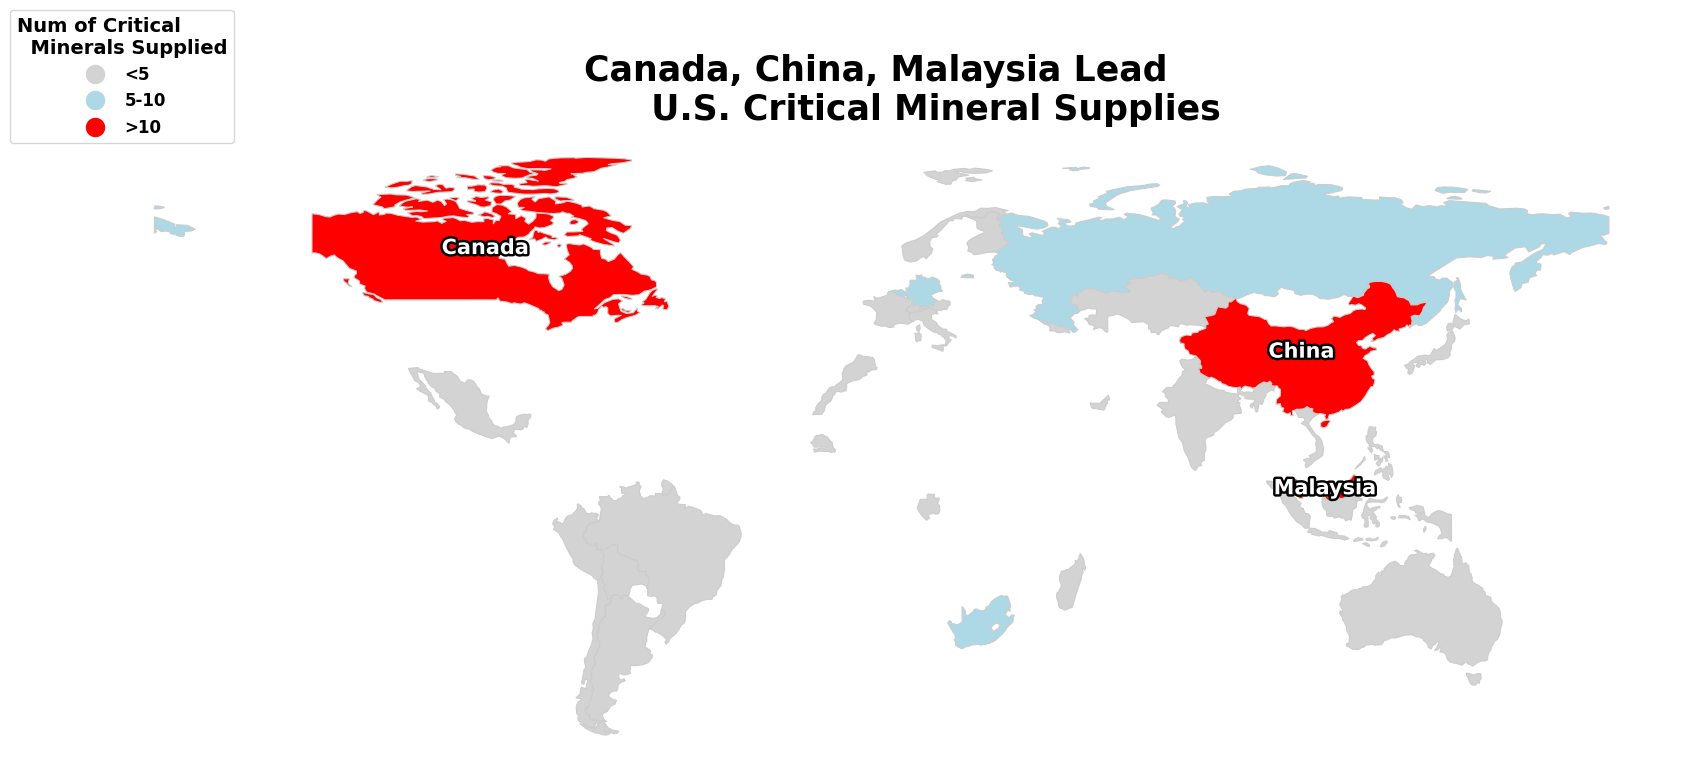

In [211]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_world = world.merge(df2, how='left', left_on='name', right_on='Country')

# Define a color for each bin
color_map = {'<5': 'lightgrey', '5-10': 'lightblue', '>10': 'red'}



# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 20))
fig.subplots_adjust(top=1.2, bottom=0.05, left=0.15, right=0.95) 

# Remove axis off the plot
ax.axis('off')

# Add a title
ax.set_title('Canada, China, Malaysia Lead \n         U.S. Critical Mineral Supplies', 
             fontdict={'fontsize': '25', 'fontweight' : 'bold'})


cmap = matplotlib.colors.ListedColormap([color_map[label] for label in labels])

# Create an informative legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markerfacecolor=color_map[label], markersize=15)
                   for label in labels]
legend=ax.legend(handles=legend_elements, loc='upper left', title_fontsize=14, fontsize=12, title= 'Num of Critical \n  Minerals Supplied', bbox_to_anchor=(-0.05, 1.2))
legend.get_title().set_fontweight('bold')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Plotting
merged_world.dropna().plot(column='Bin', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')
for country in ['China', 'Malaysia', 'Canada']:
    # Get the position of the country's label
    x, y = merged_world.loc[merged_world['Country'] == country, 'geometry'].centroid.x.values[0], \
           merged_world.loc[merged_world['Country'] == country, 'geometry'].centroid.y.values[0]
    # Add text annotation
    text=ax.text(x, y, country, fontsize=15, ha='center', va='center', fontweight='bold', color='white')
    text.set_path_effects([withStroke(linewidth=3.5, foreground='black')])

plt.show()

In [212]:


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_world = world.merge(df2[['Country', 'US Relation']], how='left', left_on='name', right_on='Country')


/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_3236/1440006357.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_3236/1033405139.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_3236/1033405139.py:30: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  merged_world.plot(column='color', ax=ax, legend=True,


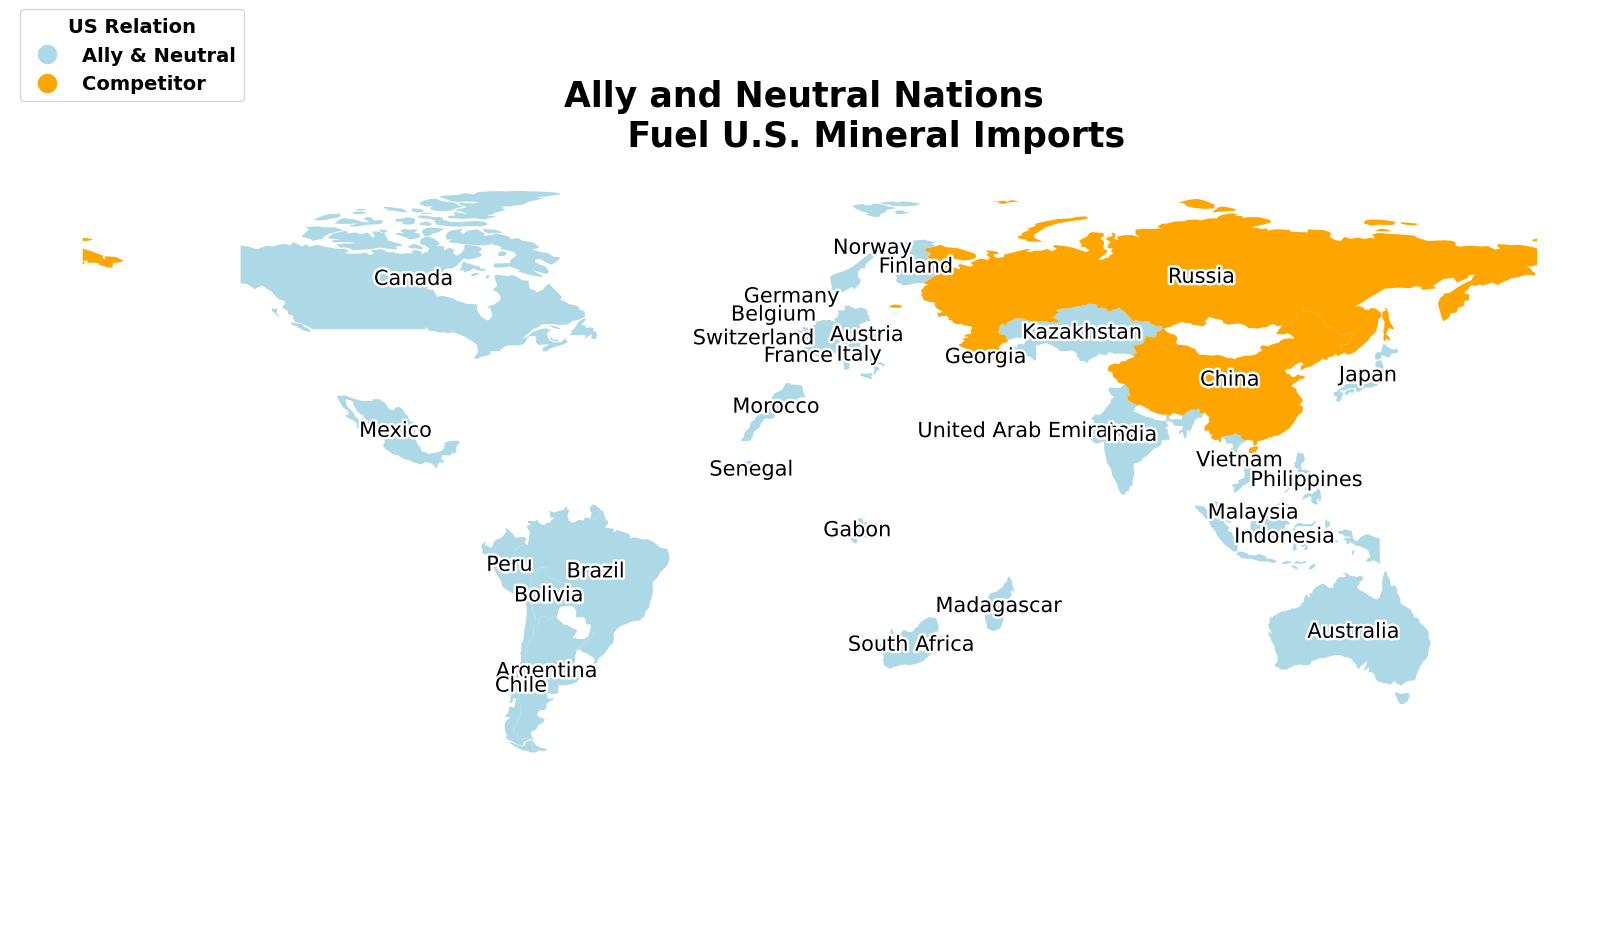

In [213]:



world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


merged_world = world.merge(df2[['Country', 'US Relation']], how='left', left_on='name', right_on='Country')


color_map = {
    'Ally': 'lightblue',
    'Neutral': 'lightblue',
    'Competitor': 'orange',
    'undefined': 'white'  
}


merged_world['US Relation'] = merged_world['US Relation'].fillna('undefined')


fig, ax = plt.subplots(1, figsize=(20, 20))
fig.subplots_adjust(top=1.2, bottom=0.05, left=0.15, right=0.95) 

ax.axis('off')


ax.set_title('Ally and Neutral Nations \n           Fuel U.S. Mineral Imports', fontdict={'fontsize': 25, 'fontweight' : 'bold'})

# Create a color column based on the 'US Relation'
merged_world['color'] = merged_world['US Relation'].map(color_map)


merged_world.plot(column='color', ax=ax, legend=True,
           legend_kwds={'label': "US Relation with Countries"},
           color=merged_world['color'])


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Ally & Neutral', markerfacecolor='lightblue', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Competitor', markerfacecolor='orange', markersize=15)
]

legend=ax.legend(handles=legend_elements, loc='upper left', title_fontsize=14, fontsize=14, title= 'US Relation', bbox_to_anchor=(0, 1.2))
legend.get_title().set_fontweight('bold')
for text in legend.get_texts():
    text.set_fontweight('bold')


label_offsets = {
    'Germany': (-3, 6),
    'Belgium': (-3, 2),
    'Switzerland': (-7, 0)

}


for idx, row in merged_world.iterrows():
    if row['US Relation'] in ['Ally', 'Neutral', 'Competitor']:
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        if row['name'] in label_offsets:
            x += label_offsets[row['name']][0]
            y += label_offsets[row['name']][1]
            ha = 'right'  
        else:
            ha = 'center'  
        text = ax.text(x, y, row['name'], fontsize=15, ha=ha, va='center', color='black')
        text.set_path_effects([withStroke(linewidth=3.5, foreground='white')])


plt.show()
